# T-Test Experiments

In [136]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import ast

In [137]:
file = "cleaned/cleaned_10_28_2023.csv"
with open(file, "r") as f:
    df = pd.read_csv(f, converters={'routes': ast.literal_eval})
df.head()

,station_complex_id,borough,routes,payment_method,latitude,longitude,ridership,transfers,region,ridership_percap,transfers_percap
0,A002,Manhattan,"[5, N, R, 4, W, 6]",metrocard,40.762661,-73.967255,11868,995,NW,0.007435,0.000623
1,A002,Manhattan,"[5, N, R, 4, W, 6]",omny,40.762661,-73.967255,15570,2348,NW,0.009754,0.001471
2,A006,Manhattan,"[N, R, W]",metrocard,40.764812,-73.973351,5546,71,NW,0.003474,0.000044
3,A006,Manhattan,"[N, R, W]",omny,40.764812,-73.973351,7802,238,NW,0.004888,0.000149
4,A010,Manhattan,"[N, R, Q, W]",metrocard,40.764664,-73.980659,9293,153,NW,0.005822,0.000096


In [138]:
new_df = {
    "station_complex_id":[],
    "omny_r_prop":[],
    "omny_t_prop":[],
    "metrocard_r_prop":[],
    "metrocard_t_prop":[]
}

for station in df["station_complex_id"].unique():
    temp = df[df["station_complex_id"] == station].copy()
    if len(temp) == 2:
        temp["ridership"] = temp["ridership"] / sum(temp["ridership"])
        temp["transfers"] = temp["transfers"] / sum(temp["transfers"])
        new_df["station_complex_id"].append(station)

        new_df["omny_r_prop"].append(temp[temp["payment_method"] == "omny"]["ridership"].iloc[0])
        new_df["omny_t_prop"].append(temp[temp["payment_method"] == "omny"]["transfers"].iloc[0])
        new_df["metrocard_r_prop"].append(temp[temp["payment_method"] == "metrocard"]["ridership"].iloc[0])
        new_df["metrocard_t_prop"].append(temp[temp["payment_method"] == "metrocard"]["transfers"].iloc[0])
    
new_df = pd.DataFrame(new_df).dropna()
new_df.head()

,station_complex_id,omny_r_prop,omny_t_prop,metrocard_r_prop,metrocard_t_prop
0,A002,0.567461,0.702363,0.432539,0.297637
1,A006,0.584507,0.770227,0.415493,0.229773
2,A010,0.587820,0.642523,0.412180,0.357477
3,A013,0.566999,0.786517,0.433001,0.213483
4,A022,0.562026,0.721127,0.437974,0.278873


In [139]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406 entries, 0 to 418
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   station_complex_id  406 non-null    object 
 1   omny_r_prop         406 non-null    float64
 2   omny_t_prop         406 non-null    float64
 3   metrocard_r_prop    406 non-null    float64
 4   metrocard_t_prop    406 non-null    float64
dtypes: float64(4), object(1)
memory usage: 19.0+ KB


In [140]:
new_df.describe()

,omny_r_prop,omny_t_prop,metrocard_r_prop,metrocard_t_prop
count,406.000000,406.000000,406.000000,406.000000
mean,0.472733,0.557876,0.527267,0.442124
std,0.135958,0.205806,0.135958,0.205806
min,0.175641,0.000000,0.220193,0.000000
25%,0.352600,0.408758,0.403618,0.290087
50%,0.456063,0.561841,0.543937,0.438159
75%,0.596382,0.709913,0.647400,0.591242
max,0.779807,1.000000,0.824359,1.000000


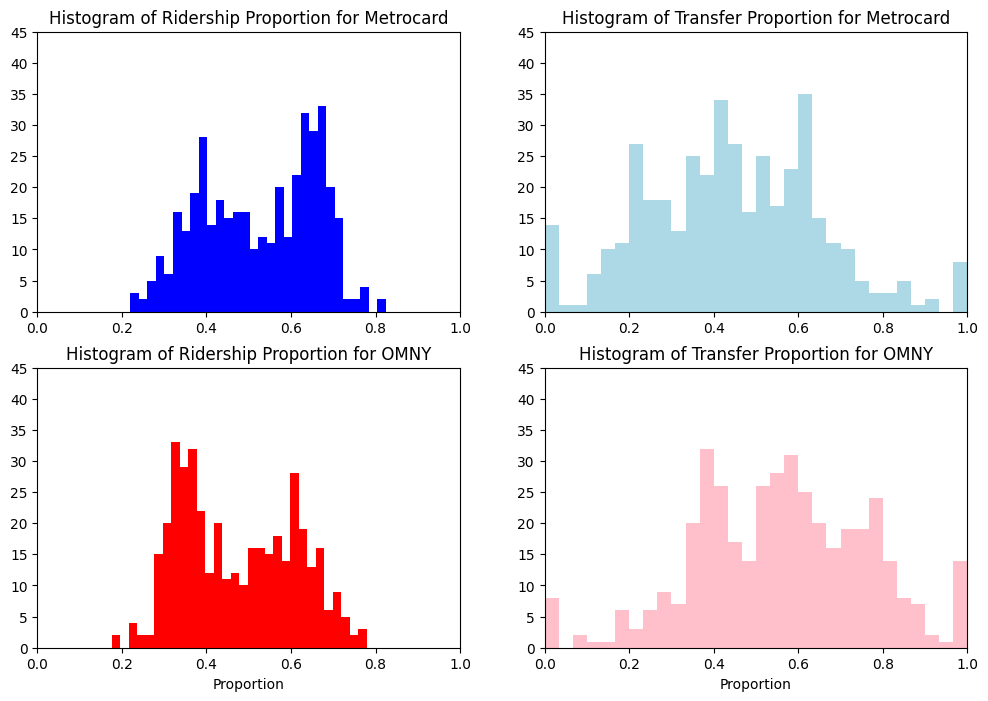

In [141]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

axes[0, 0].hist(new_df["metrocard_r_prop"], bins=30, color='blue', alpha=1)
axes[0, 0].set_title("Histogram of Ridership Proportion for Metrocard")

axes[0, 1].hist(new_df["metrocard_t_prop"], bins=30, color='lightblue', alpha=1)
axes[0, 1].set_title("Histogram of Transfer Proportion for Metrocard")

axes[1, 0].hist(new_df["omny_r_prop"], bins=30, color='red', alpha=1)
axes[1, 0].set_title("Histogram of Ridership Proportion for OMNY")

axes[1, 1].hist(new_df["omny_t_prop"], bins=30, color='pink', alpha=1)
axes[1, 1].set_title("Histogram of Transfer Proportion for OMNY")

for m in [0,1]:
    for n in [0,1]:
        axes[m,n].set_ylim(0,45)
        axes[m,n].set_xlim(0,1)
        if m==1:
            axes[m,n].set_xlabel("Proportion")

plt.show()

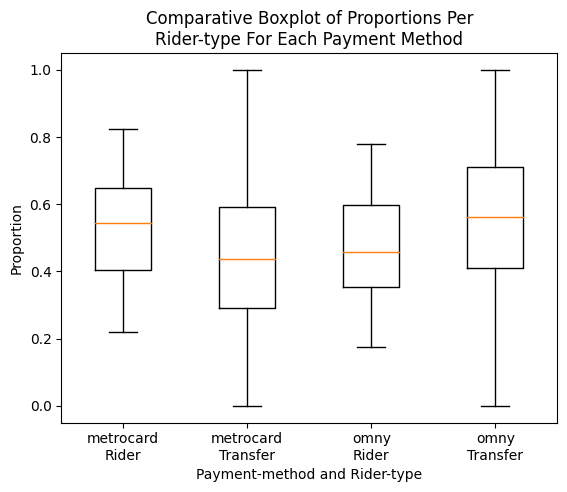

In [149]:
labs = []
plt_data = []
for pm in ["metrocard","omny"]:
    for tp in ["r","t"]:
        name = "Transfer" if tp == "t" else "Rider"
        plt_data.append(new_df[f"{pm}_{tp}_prop"])
        labs.append(f"{pm}\n{name}")

plt.boxplot(plt_data, labels = labs)
plt.title("Comparative Boxplot of Proportions Per\nRider-type For Each Payment Method")
plt.xlabel("Payment-method and Rider-type")
plt.ylabel("Proportion")
plt.show()

In [143]:
t_statistic, p_value = ttest_ind(new_df["metrocard_r_prop"], new_df["metrocard_t_prop"])
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 6.95523233130695
p-value: 7.256463763682802e-12


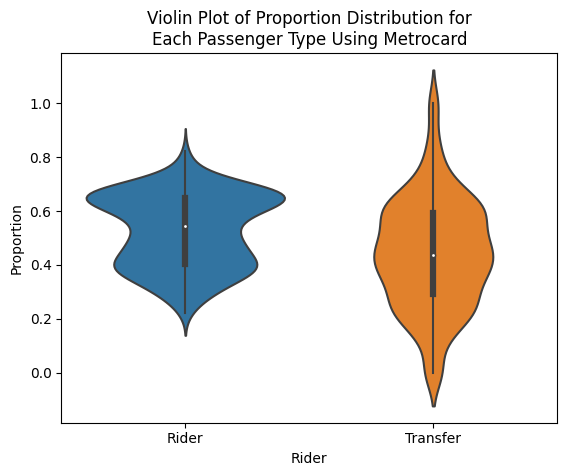

In [151]:
violin_data = {
    "Proportion":list(new_df["metrocard_r_prop"])+list(new_df["metrocard_t_prop"]),
    "Rider":["Rider" for e in new_df["metrocard_r_prop"]] + ["Transfer" for e in new_df["metrocard_t_prop"]]
}

sns.violinplot(x='Rider', y='Proportion', data=pd.DataFrame(violin_data))
plt.title("Violin Plot of Proportion Distribution for\nEach Passenger Type Using Metrocard")
plt.show()

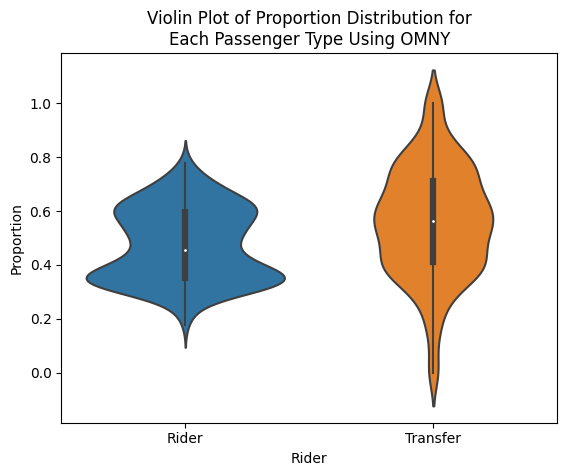

In [152]:
violin_data = {
    "Proportion":list(new_df["omny_r_prop"])+list(new_df["omny_t_prop"]),
    "Rider":["Rider" for e in new_df["omny_r_prop"]] + ["Transfer" for e in new_df["omny_t_prop"]]
}

sns.violinplot(x='Rider', y='Proportion', data=pd.DataFrame(violin_data))
plt.title("Violin Plot of Proportion Distribution for\nEach Passenger Type Using OMNY")
plt.show()

In [145]:
t_statistic, p_value = ttest_ind(new_df["omny_r_prop"], new_df["omny_t_prop"])
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: -6.955232331306956
p-value: 7.256463763682566e-12
